# Petrol Formulation Analysis

**Scenario:** 

A customer informed their consultant that they have developed several formulations of petrol that gives different charactristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.

Please assist the consultant in the area of statistical analysis by doing this:

a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

b. A graphical analysis of the additives, including a distribution study.

c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

## Import Data from MS SQL Database

In [356]:
import pymssql
import pandas as pd


# server config
server = 'localhost' 
database = 'demoDB' 
username = 'sa' 
password = 'Pwd@1234'  

# open connection to MS SQL Server 
conn = pymssql.connect( server=server, 
                        user=username, 
                        password=password, 
                        database=database)  

# select all from SQL table to insert in dataframe.
query = "SELECT * FROM PetrolFormulation;"
dataset = pd.read_sql(query, conn)

## Pre-Process Dataset as Needed as a Separate Copy

In [368]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = StandardScaler().fit_transform(dataset.values)
scaled_dataset = pd.DataFrame(scaled_features, index=dataset.index, columns=dataset.columns)

## Descriptive Analysis of Petrol Formulation Dataset for Identifying Relationships and Trends (if any)

In [431]:
from scipy.stats import shapiro, spearmanr

for column in dataset:
    stat, p_val = shapiro(dataset[column].values)

    if p_val > 0.05:
        print("“"+dataset.columns[i]+"” is a normal distribution, w="+str(stat)+" p="+str(p_val))
    else:
        print("“"+dataset.columns[i]+"” is not a normal distribution, w="+str(stat)+" p="+str(p_val))

rej=""
print("\n\n")
ptive, ntive, no = 0, 0, 0
prev = [dataset.columns[0]]
for col_ in dataset:
    for col in dataset:
        r, p = spearmanr(dataset[col_].values, dataset[col].values)
        if r > 0:
            relationship = "positive"
        else:
            relationship = "negative"
        if abs(r) >= 0.7:
            strength = "very strong"
        elif abs(r) >= 0.4 and abs(r) < 0.7:
            strength = "strong"
        elif abs(r) >= 0.3 and abs(r) < 0.4:
            strength = "moderate"
        elif abs(r) >= 0.2 and abs(r) < 0.3:
            strength = "weak"
        else:
            strength = ""
            relationship = "negligible or none"
        if p > 0.05:
            rej = "uncorrelated, fail to reject H0"
        else:
            rej = "correlated"
        if col != col_ and col not in prev:
            print("“"+col_+"” and "+"“"+col+"”: "+strength+" "+relationship+" "+rej+" (w="+str(r)+" p="+str(p)+")")
            if relationship == "negligible or none":
                no += 1
            elif relationship == "positive":
                ptive += 1
            elif relationship == "negative":
                ntive += 1
            else:
                pass
    prev.append(col_)

print("\n\npositive correlation: "+str(ptive))
print("negative correlation: "+str(ntive))
print("no correlation: "+str(no))

“i” is not a normal distribution, w=0.8675718903541565 p=1.0766247919222205e-12
“i” is not a normal distribution, w=0.9457632303237915 p=3.4662537018448347e-07
“i” is not a normal distribution, w=0.699336588382721 p=2.3909611661875223e-19
“i” is not a normal distribution, w=0.9434122443199158 p=2.083013299625236e-07
“i” is not a normal distribution, w=0.9196622967720032 p=2.175188917874493e-09
“i” is not a normal distribution, w=0.44161754846572876 p=2.1721965417791313e-25
“i” is not a normal distribution, w=0.7938679456710815 p=4.2866203996304243e-16
“i” is not a normal distribution, w=0.4085649847984314 p=5.383263238128378e-26
“i” is not a normal distribution, w=0.653200089931488 p=1.156668784076633e-20



“a” and “b”:  negligible or none uncorrelated, fail to reject H0 (w=0.031039673411322587 p=0.6516143392572467)
“a” and “c”:  negligible or none correlated (w=0.1441558576473802 p=0.03507533564171534)
“a” and “d”: strong negative correlated (w=-0.4918214588177193 p=1.958951833066406

## View Statiscal Profile for More Insight

In [359]:
from pandas_profiling import ProfileReport

profile = ProfileReport(dataset, title="Profiling Report for Petrol Formulation Additives", progress_bar=False, explorative=True)
#profile.to_file("Profiling Report for Petrol Formulation Additives.html")

statistical_profile = dataset.describe(include='all')
statistical_profile

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


## Distribution Studies

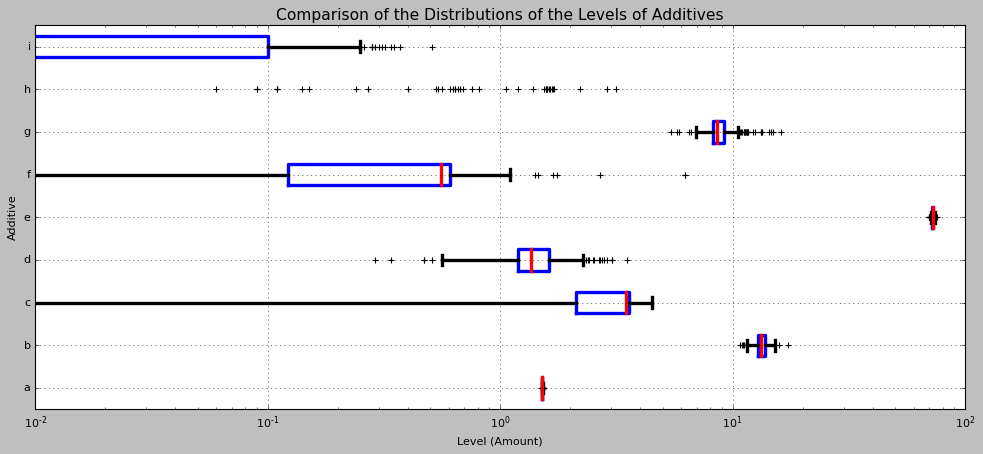

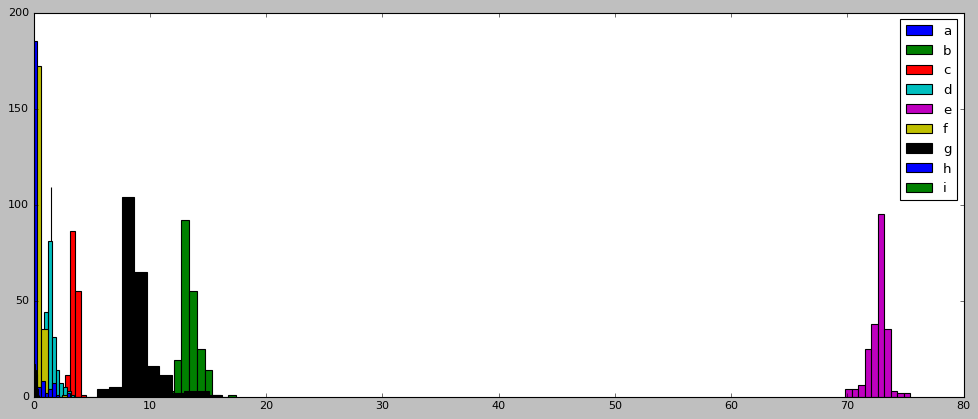

In [360]:
import matplotlib.pyplot as plt

boxprops = dict(linestyle='-', linewidth=3, color='b')
medianprops = dict(linestyle='-', linewidth=3, color='r')
meanprops = dict(linestyle='-', linewidth=3, color='m')
capprops = dict(linestyle='-', linewidth=3, color='k')
whiskerprops = dict(linestyle='-', linewidth=3, color='k')

plt.figure(figsize=(15,6))
ax = dataset.boxplot(figsize=(16, 8), vert=False, boxprops=boxprops,  
                     medianprops=medianprops, meanprops=meanprops,
                     capprops=capprops, whiskerprops=whiskerprops)
ax.set(
    title='Comparison of the Distributions of the Levels of Additives',
    xlabel='Level (Amount)',
    ylabel='Additive',
    xscale='log',
)
plt.savefig("distribution_additives_levels_comparison_log.png")
plt.show()

plt.figure(figsize=(15,6))
for l in['a','b','c','d','e','f','g','h','i']:
    plt.hist(dataset[l], edgecolor='black',  bins=10, label=l)
plt.legend(loc='upper right')
plt.savefig("additives_distributions.png")
plt.show()

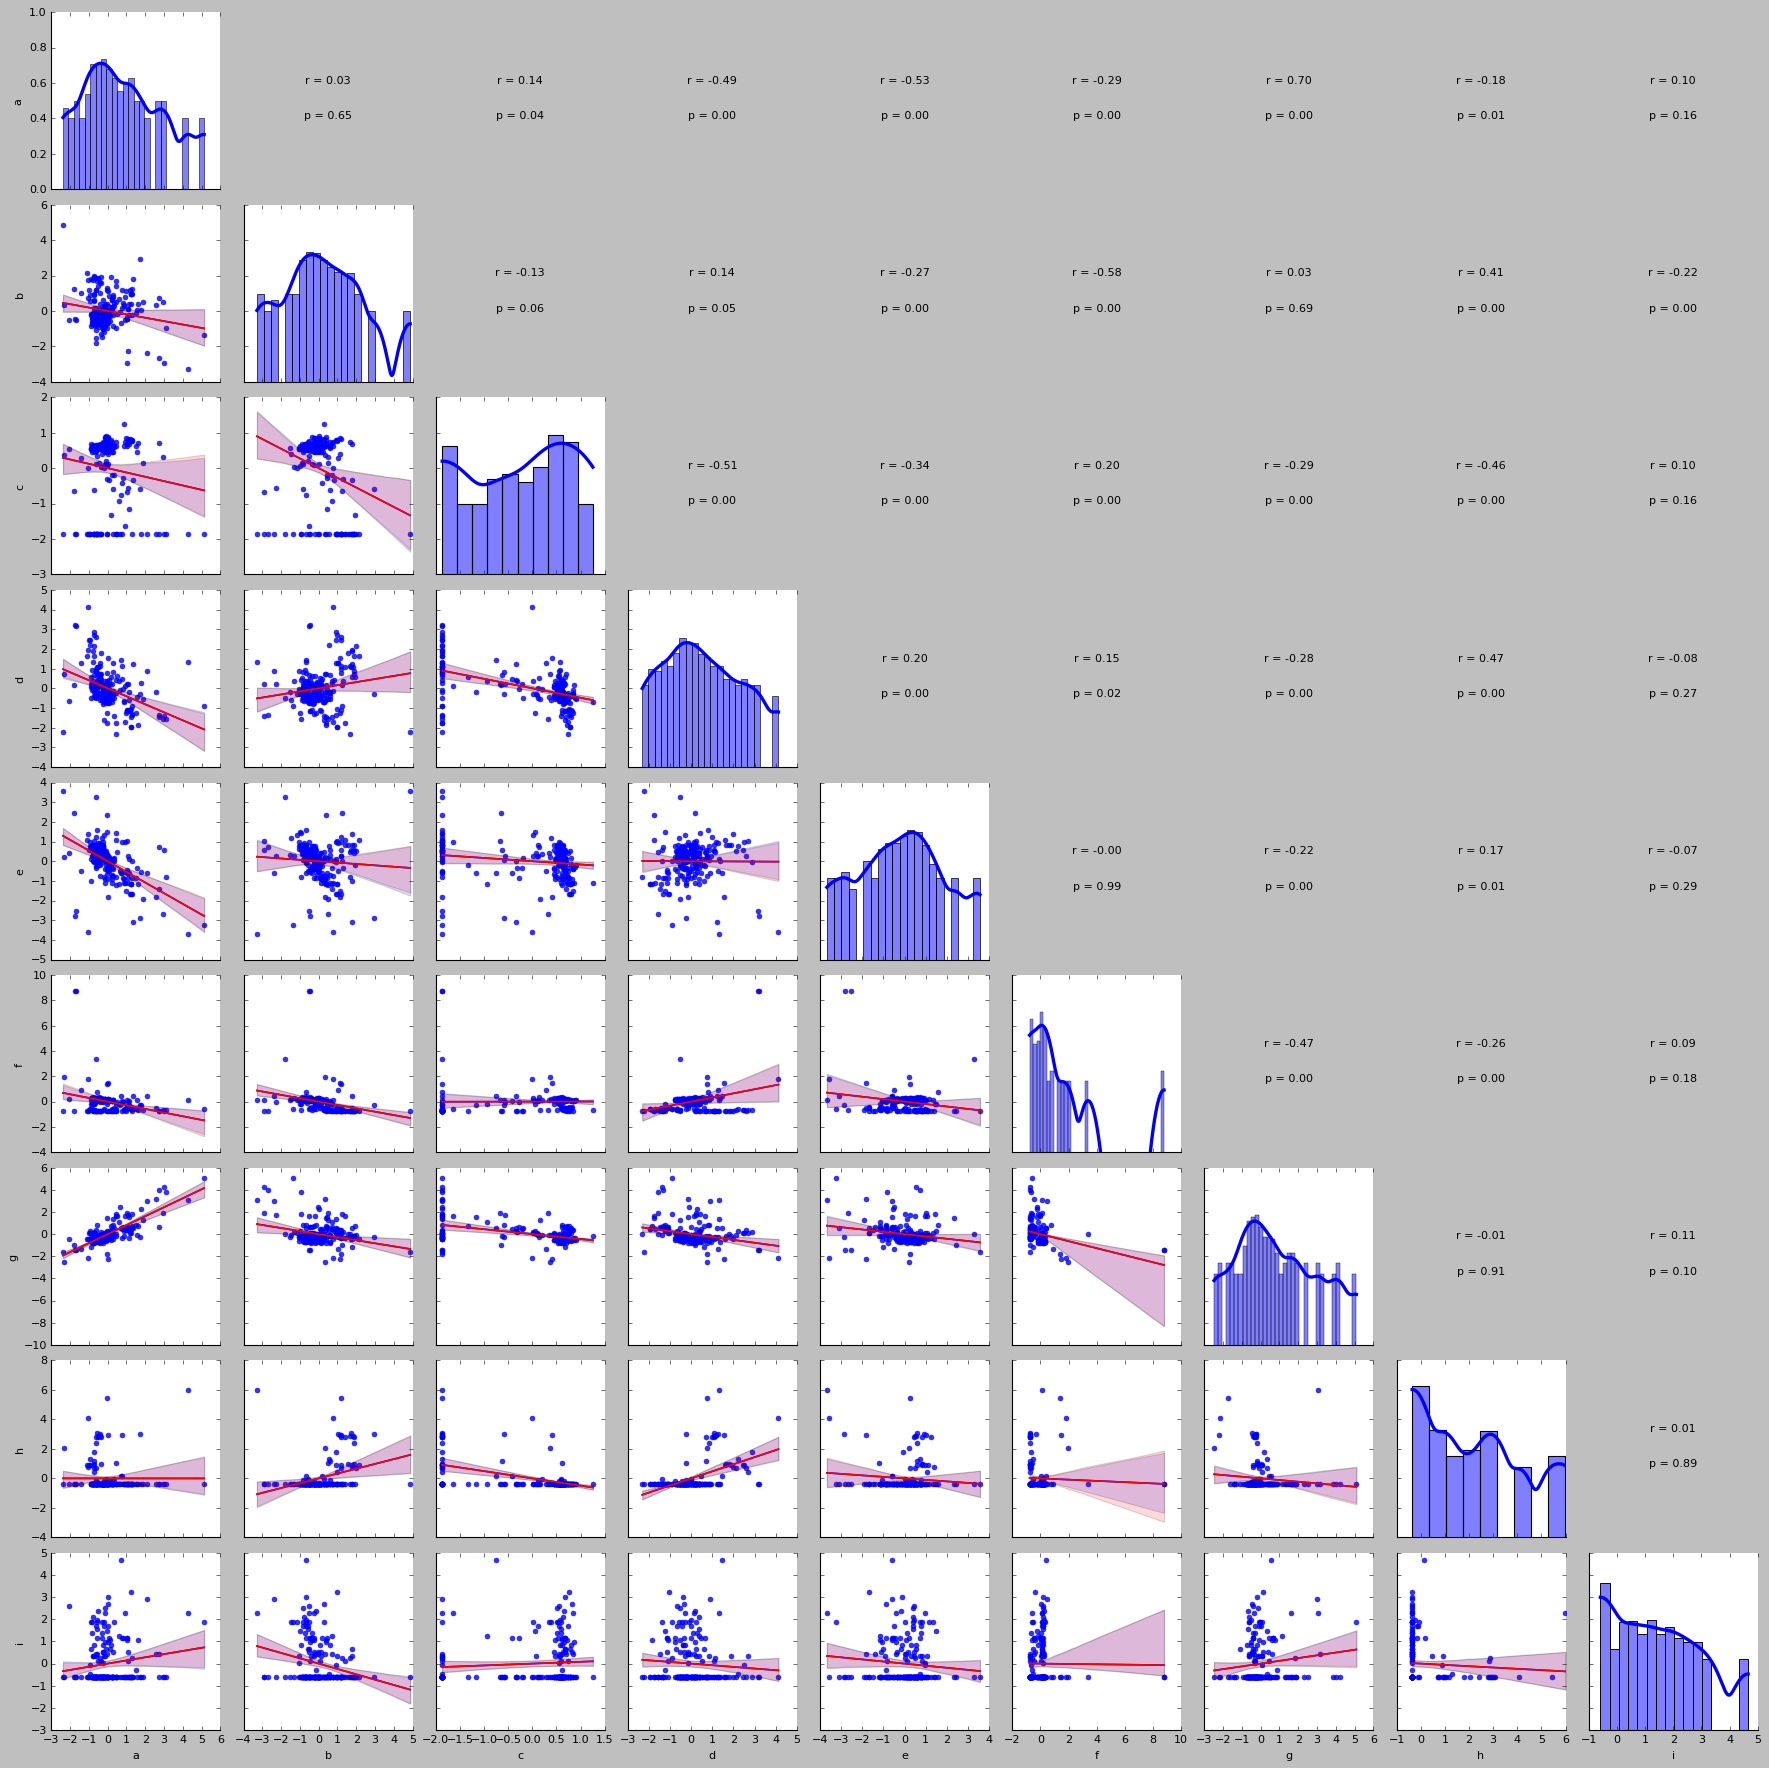

In [361]:
from scipy.stats import spearmanr
import seaborn as sns

def reg_coef(x, y, label=None, color=None, **kwargs):
    ax = plt.gca()
    r, p = spearmanr(x, y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5, 0.6), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.2f}'.format(p), xy=(0.5, 0.4), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

pg = sns.PairGrid(scaled_dataset)
pg.map_diag(sns.histplot, kde=True, line_kws={'linewidth':3, 'color':'k'}, log_scale=(False,True))
pg.map_lower(sns.regplot)
pg.map_lower(sns.regplot, scatter=False,  fit_reg=True, color='r') 
pg.map_upper(reg_coef)
pg.savefig("distribution_and_spearman_correlation_coefficient_matrix.png") 


## Fit Clustering Model to Estimate the Number of Formulations Present In Dataset

In [433]:
from sklearn.decomposition import PCA

# test for feature importance with pca
def test_feat_importance(dt):
    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(dt)
    pca_data = pd.DataFrame(abs(pca_2.components_), columns=dt.columns, index=['PC_1', 'PC_2'])

    print('\n\nImportant features according to PC 1:\n', (pca_data[pca_data > 0.3].iloc[0]).dropna())   
    print('\nImportant features according to PC 2:\n', (pca_data[pca_data > 0.3].iloc[1]).dropna())
    return

test_feat_importance(scaled_dataset)



Important features according to PC 1:
 a    0.545177
d    0.428709
g    0.492306
Name: PC_1, dtype: float64

Important features according to PC 2:
 c    0.593558
g    0.345380
h    0.484702
Name: PC_2, dtype: float64


In [408]:
# use scaled dataset for clustering
from sklearn.decomposition import PCA

# pca a and g
df_temp = scaled_dataset[['a','g']]
pca = PCA(n_components=1)
pca_c = pca.fit_transform(df_temp)

# drop a, b, e, g
scrubed_dataset = scaled_dataset.drop(['a','b','e','g'], axis=1)

# put pca component into dataset
scrubed_dataset['ag'] = pca_c

# check if importance is consistent with before
test_feat_importance(scrubed_dataset)



Important features according to PC 1:
 d     0.451836
f     0.355379
ag    0.776605
Name: PC_1, dtype: float64

Important features according to PC 2:
 c     0.649050
d     0.401406
h     0.523871
ag    0.370924
Name: PC_2, dtype: float64


  0%|          | 0/19 [00:00<?, ?it/s]

 32%|███▏      | 6/19 [00:00<00:00, 57.14it/s]

 63%|██████▎   | 12/19 [00:00<00:00, 41.52it/s]

 89%|████████▉ | 17/19 [00:00<00:00, 33.27it/s]

100%|██████████| 19/19 [00:00<00:00, 33.92it/s]

  0%|          | 0/245 [00:00<?, ?it/s]

  5%|▌         | 13/245 [00:00<00:01, 128.15it/s]

 11%|█         | 26/245 [00:00<00:01, 129.23it/s]

 16%|█▌        | 39/245 [00:00<00:01, 126.15it/s]

 22%|██▏       | 53/245 [00:00<00:01, 129.00it/s]

 27%|██▋       | 67/245 [00:00<00:01, 129.68it/s]

 33%|███▎      | 80/245 [00:00<00:01, 129.37it/s]

 38%|███▊      | 93/245 [00:00<00:01, 125.94it/s]

 43%|████▎     | 106/245 [00:00<00:01, 126.03it/s]

 49%|████▉     | 120/245 [00:00<00:00, 127.19it/s]

 55%|█████▍    | 134/245 [00:01<00:00, 130.60it/s]

 60%|██████    | 148/245 [00:01<00:00, 132.22it/s]

 66%|██████▌   | 162/245 [00:01<00:00, 132.94it/s]

 72%|███████▏  | 176/245 [00:01<00:00, 133.46it/s]

 78%|███████▊  | 190/245 [00:01<00:00, 133.06it/s]

 83%|████████▎ | 204/245 [00:01<00:00, 134.11it/s]

 89%|████████▉ | 218/245 [00:01<00:00, 133.88it/s]

 95%|█████████▍| 232/245 [00:01<00:00, 132.95it/s]

100%|██████████| 245/245 [00:01<00:00, 130.75it/s]

<Figure size 640x480 with 0 Axes>

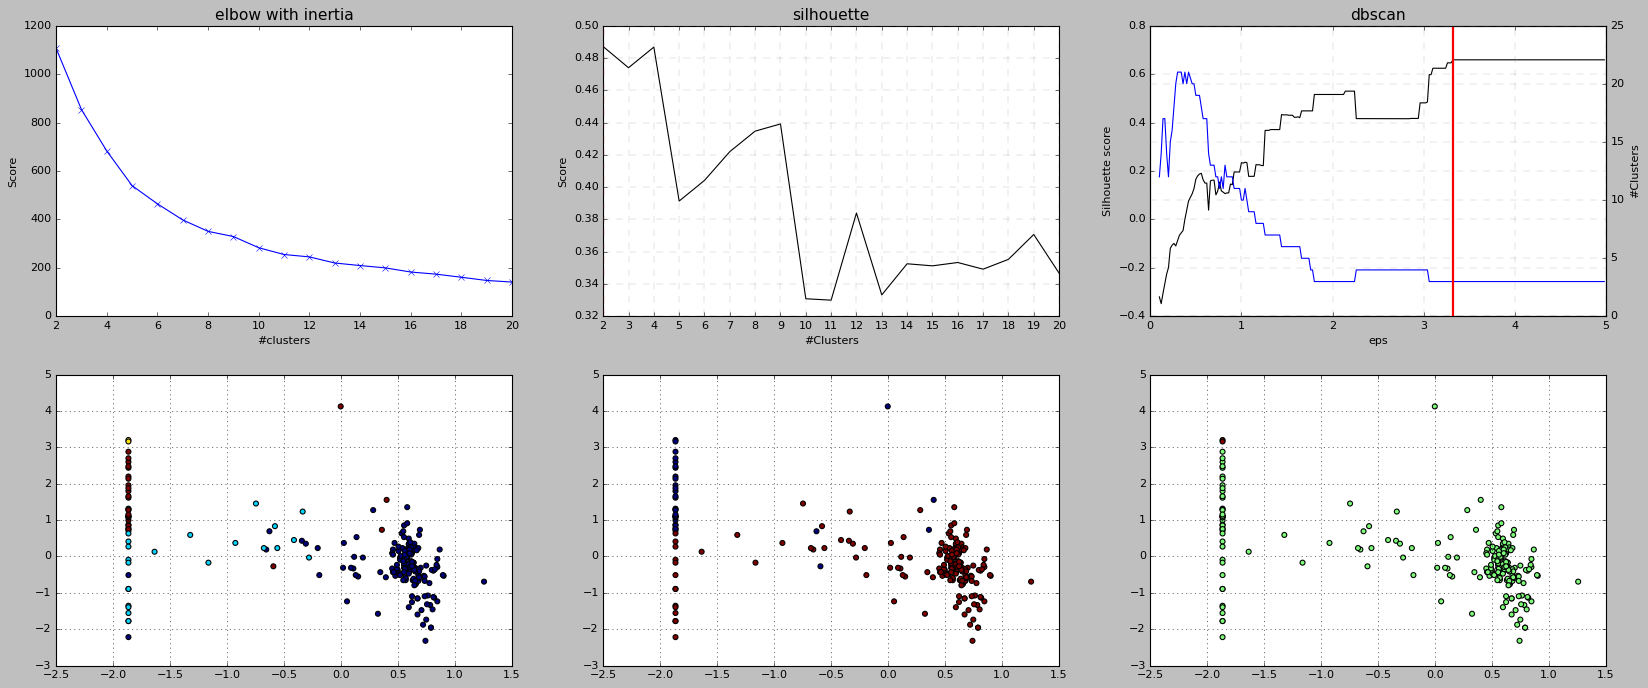


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:00<00:00, 677.80it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [4].
[clusteval] >Fin.


<Figure size 640x480 with 0 Axes>

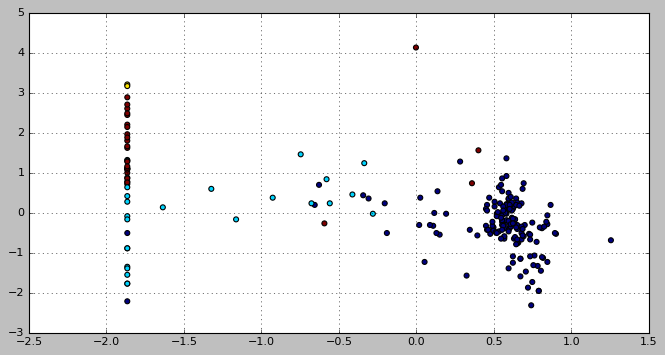

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=16.802. Be patient now..


TypeError: 'str' object is not callable

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

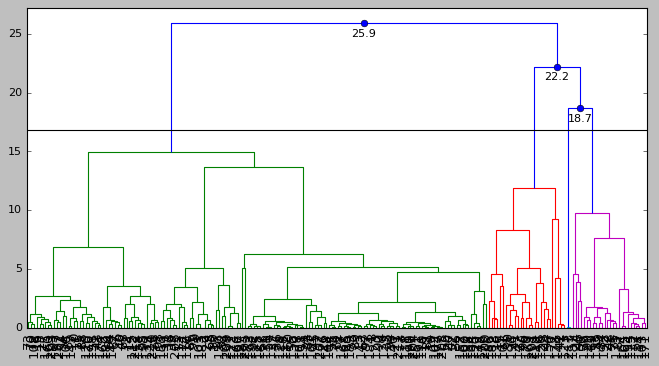

In [427]:
import matplotlib.pyplot as plt
from clusteval import clusteval, silhouette, derivative, dbscan, dbindex

X = scrubed_dataset.to_numpy()

max_clust = 21

plt.figure()
fig, axs = plt.subplots(2, 3, figsize=(25, 10))

# if using k-means
# elbow
inertias = []
K = range(2, max_clust) 
for k in K:
    km = KMeans(n_clusters=k)
    _ = km.fit(X)
    inertias.append(km.inertia_)
axs[0][0].plot(K, inertias, 'bx-')
axs[0][0].title.set_text('elbow with inertia')
axs[0][0].set(xlabel='#clusters',ylabel='Score')
axs[1][0].scatter(X[:,0], X[:,1], c=results['labx'])
axs[1][0].grid(True)

# silhouette
results = silhouette.fit(X, cluster='kmeans', linkage='centroid', max_clust=max_clust, verbose=False)
_ = silhouette.plot(results, title='silhouette', ax=axs[0][1], visible=False)
axs[1][1].scatter(X[:,0], X[:,1], c=results['labx'])
axs[1][1].grid(True)

# derivative
results = dbscan.fit(X, max_clust=max_clust, verbose=False)
_ = dbscan.plot(results, title='dbscan', ax=axs[0][2], visible=False)
axs[1][2].scatter(X[:,0], X[:,1], c=results['labx'])
axs[1][2].grid(True)

plt.show()
plt.clf()

# if using hierarchical clustering
# agglomerative
ce = clusteval(max_clust=max_clust)
results = ce.fit(X)
ax = plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=results['labx'])
plt.grid(True)
plt.show()
plt.clf()
plt.figure()
ce.dendrogram(verbose=1, figsize=(10,5), orientation='top')
plt.show()
plt.clf()

## ignore the error log, it is a bug from the clusteval and other library dependencies

In [430]:
from sklearn.cluster import KMeans
import numpy as np

sc = KMeans(5, 
            algorithm='elkan', 
            n_init=100)

clusters = sc.fit_predict(scrubed_dataset)

print("number of clusters:\n", len(set(clusters)))
print("cluster assigned to formulation:\n", clusters)
values, counts = np.unique(clusters, return_counts=True)
print("unique cluster count:")
print(values)
print(counts)

number of clusters:
 5
cluster assigned to formulation:
 [1 4 1 1 1 1 0 3 1 1 1 1 1 0 0 0 0 4 0 1 1 1 2 1 2 1 1 1 4 1 4 1 2 1 1 1 1
 1 1 1 0 4 4 1 4 1 2 1 2 2 1 1 1 0 0 1 1 2 1 2 1 1 1 1 0 1 1 0 0 2 0 2 0 0
 0 1 1 1 1 1 1 1 0 1 2 1 1 2 0 1 1 1 1 0 1 0 1 1 0 2 1 4 1 2 1 1 1 1 0 4 1
 1 0 1 2 2 1 1 1 4 0 4 0 1 0 1 4 1 1 1 1 1 1 2 1 2 0 1 1 0 1 2 1 1 4 1 4 1
 1 0 4 1 1 1 1 1 4 0 0 2 0 1 0 1 2 2 1 1 1 4 1 2 1 0 1 0 2 1 4 4 0 2 0 1 1
 1 4 1 1 1 1 1 2 1 2 1 4 0 1 1 1 4 0 0 1 1 1 1 1 0 0 1 0 3]
unique cluster count:
[0 1 2 3 4]
[ 43 120  27   2  22]
